In [158]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 3
Kernel Ridge Regression

In [166]:
def kernelFunc(x1, x2, kernel = 'gaussian', sigma = 1.0, p = 2):
    if kernel == 'linear':
        return np.dot(x1, x2)
    elif kernel == 'gaussian':
        return np.exp(-np.linalg.norm(x1 - x2)**2/(2*(sigma**2)))
    elif kernel == 'exponent':
        return np.exp(np.dot(x1, x2))
    elif kernel == 'polynomial':
        return (1 + np.dot(x1, x2))**p

def trainRR(x, y, lamda = 0, kernel = 'gaussian', sigma = 1.0, p = 2):
    n,m = x.shape
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i][j] = kernelFunc(x[i], x[j], kernel, sigma, p)
    alpha = np.dot(np.linalg.inv(K + lamda*np.eye(n)), y)
    return alpha

def predictorRR(alpha, x_test, x_train, y_train, kernel = 'gaussian', sigma = 1.0, p = 2):
    n, m = x_train.shape
    y_test = np.zeros(x_test.shape[0])
    for j, x_test_case in enumerate(x_test):
        temp = np.zeros(n)
        for i in range(n):
            temp[i] = kernelFunc(x_train[i], x_test_case, kernel, sigma, p)
        temp = np.reshape(temp, (-1, 1))
        y_test[j] = np.dot(alpha.T, np.reshape(temp, (-1, 1)))
    #print(y_test)
    if x_train.shape[1] == 2:
        fig = plt.figure(figsize=(8, 8))
        ax = plt.axes(projection='3d')
        ax.scatter(x_train[:, 0], x_train[:, 1], y_train, 'b')
        ax.scatter(x_test[:, 0], x_test[:, 1], y_test, 'r')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')
        plt.show()
    elif x_train.shape[1] == 1:
        plt.scatter(x_train, y_train, color = 'b', label = 'train points')
        plt.scatter(x_test, y_test, color = 'r', label = 'test points')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

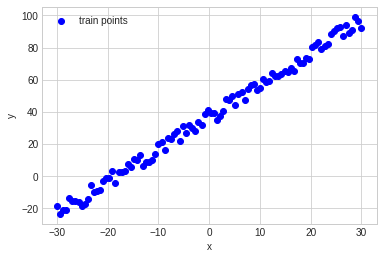

X train dimension :  (100, 1)
y train dimension :  (100, 1)
x test dimension :  (60, 1)


In [177]:
x = np.reshape(np.linspace(-30,30,100), (-1, 1))
y_train = 2*(x+15) + np.random.random_sample(x.shape)*10 + 2
x_train = x
if x_train.shape[1] == 2:
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')
    ax.scatter(x_train[:, 0], x_train[:, 1], y_train, 'b')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()
elif x_train.shape[1] == 1:
    x_train = x
    plt.scatter(x_train[:, 0], y_train, color = 'b', label = 'train points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
x_test = np.arange(-10,20,0.5).reshape(-1, 1)

print("X train dimension : ", x_train.shape)
print("y train dimension : ", y_train.shape)
print("x test dimension : ", x_test.shape)

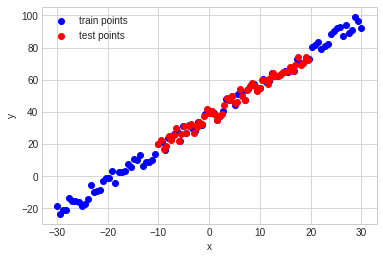

In [178]:
alpha = trainRR(x_train, y_train, kernel = 'gaussian')
predictorRR(alpha, x_test, x_train, y_train, kernel = 'gaussian')

noisy sinusoidal data points

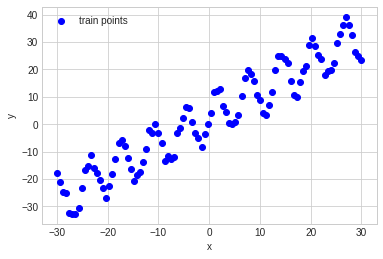

In [179]:
if x_train.shape[1] == 2:
    # y_train_sin = np.sin(x_train[:,0])+x_train[:,1]
    y_train_sin = x_train[:, 0] + 8*np.sin(x_train[:,0]) + 5*np.random.rand(x_train.shape[0])
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')
    ax.scatter(x_train[:, 0], x_train[:, 1], y_train_sin, 'b')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()
elif x_train.shape[1] == 1:
    y_train_sin = x_train[:, 0] + 8*np.sin(x_train[:, 0]) + 5*np.random.rand(x_train.shape[0])
    plt.scatter(x_train, y_train_sin, color = 'b', label = 'train points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

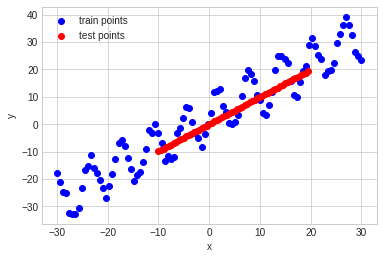

In [180]:
alpha = trainRR(x_train, y_train_sin, kernel = 'linear', lamda = 0.1)
predictorRR(alpha, x_test, x_train, y_train_sin, kernel = 'linear')

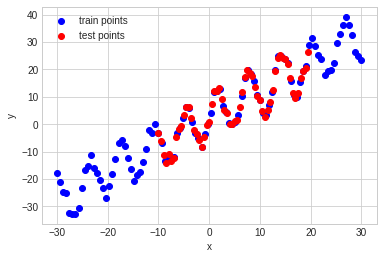

In [181]:
alpha = trainRR(x_train, y_train_sin, kernel = 'gaussian')
predictorRR(alpha, x_test, x_train, y_train_sin, kernel = 'gaussian')

## Problem 4
PCA (linear and Kernel)

In [182]:
def PCA(X, num_components, kernel = 'gaussian', sigma = 1.0, p = 2, gamma = 15):
    if kernel == 'None':
        X_mean = X - np.mean(X, axis = 0)
        cov_X = np.cov(X_mean, rowvar = False)
        eigen_values, eigen_vectors = np.linalg.eig(cov_X)
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigen_values = eigen_values[sorted_index]
        sorted_eigen_vectors = eigen_vectors[:, sorted_index]
        eigen_vector_subset = sorted_eigen_vectors[:, 0:num_components]
        reduced_X = np.dot(eigen_vector_subset.T, X_mean.T).T
    else:
        n, m = X.shape
        K = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                K[i][j] = kernelFunc(X[i, :], X[j, :], kernel, sigma, p)
        ones_array = np.ones(K.shape)/n
        K = K - ones_array@K - K@ones_array + ones_array@K@ones_array
        eigen_values, eigen_vectors = np.linalg.eigh(K)
        sorted_index = np.argsort(eigen_values)[::-1]
        sorted_eigen_values = eigen_values[sorted_index]
        sorted_eigen_vectors = eigen_vectors[:, sorted_index]
        eigen_vector_subset = sorted_eigen_vectors[:, :num_components]
        reduced_X = np.dot(eigen_vector_subset.T, K.T).T
    return reduced_X

### data point generation
random circular data points are picked with some noise added having two different labels.

X dimension :  (200, 2)
y dimension :  (200, 1)


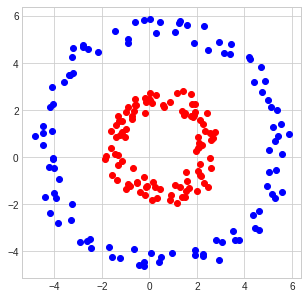

In [205]:
randProba = lambda a: a/sum(a)
npoints = 100 # points to chose from
r1 = 5 # radius of the circle

plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
x_0_0 = r1 * np.cos(t) + np.random.rand(npoints)
x_0_1 = r1 * np.sin(t) + np.random.rand(npoints)
plt.scatter(x_0_0, x_0_1, c='b')

r2 = 2 # radius of the circle
x_1_0 = r2 * np.cos(t) + np.random.rand(npoints)
x_1_1 = r2 * np.sin(t) + np.random.rand(npoints)
plt.scatter(x_1_0, x_1_1, c='r')

x_0_0 = np.array(x_0_0).reshape(-1, 1)
x_0_1 = np.array(x_0_1).reshape(-1, 1)
x_1_0 = np.array(x_1_0).reshape(-1, 1)
x_1_1 = np.array(x_1_1).reshape(-1, 1)
x_0 = np.stack([x_0_0, x_0_1], axis=1).reshape(-1,2)
x_1 = np.stack([x_1_0, x_1_1], axis=1).reshape(-1,2)

res_0 = np.append(x_0, np.zeros((npoints,1)), axis=1)
res_1 = np.append(x_1, np.ones((npoints,1)), axis=1)

res = np.append(res_0, res_1, axis=0)
np.random.shuffle(res)

X = np.array([[res[i, 0], res[i, 1]] for i in range(len(res))])
y = np.array([[res[i, 2]] for i in range(len(res))])

print("X dimension : ", X.shape)
print("y dimension : ", y.shape)

plt.show()

Linear PCA

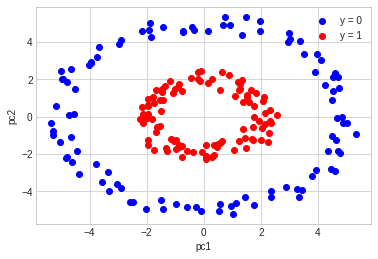

In [207]:
X_kpca = PCA(X, 2, kernel = 'None', sigma = 0.01)
y_0 = np.where(y == 0)[0]
y_1 = np.where(y == 1)[0]
x_0 = []
x_1 = []
for i in y_0:
    x_0.append(X_kpca[i])
for i in y_1:
    x_1.append(X_kpca[i])
x_0 = np.array(x_0)
x_1 = np.array(x_1)

plt.scatter(x_0[:, 0], x_0[:, 1], color = 'blue', label = 'y = 0')
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'red', label = 'y = 1')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

kernel PCA

kernel PCA separated the data points very well at different corners but above linear PCA does not do that.

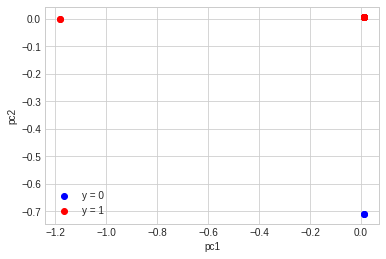

In [211]:
X_kpca = PCA(X, 2, kernel = 'gaussian', sigma = 0.01)
y_0 = np.where(y == 0)[0]
y_1 = np.where(y == 1)[0]
x_0 = []
x_1 = []
for i in y_0:
    x_0.append(X_kpca[i])
for i in y_1:
    x_1.append(X_kpca[i])
x_0 = np.array(x_0)
x_1 = np.array(x_1)

plt.scatter(x_0[:, 0], x_0[:, 1], color = 'blue', label = 'y = 0')
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'red', label = 'y = 1')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

SKlearn output to compare with above output for rbf/gaussian kernel

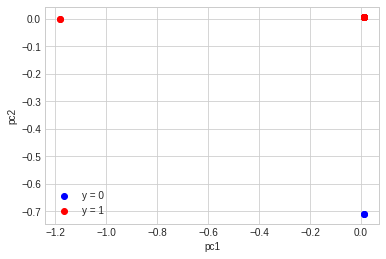

In [209]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='rbf')
X_transformed = transformer.fit_transform(X)
y_0 = np.where(y == 0)[0]
y_1 = np.where(y == 1)[0]
x_0 = []
x_1 = []
for i in y_0:
    x_0.append(X_kpca[i])
for i in y_1:
    x_1.append(X_kpca[i])
x_0 = np.array(x_0)
x_1 = np.array(x_1)

plt.scatter(x_0[:, 0], x_0[:, 1], color = 'blue', label = 'y = 0')
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'red', label = 'y = 1')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()